## HW1 - Basics of ML
Include your code in the relevant cells below.
Subparts labeled as questions (Q1.1, Q1.2, etc.) should have their answers filled in or plots placed prominently, as appropriate.

#### Important note: 

On this and future homeworks, depending on the data size and your hardware configuration, experiments may take too long if you use the complete dataset. This would be counter-productive, as you will need to run multiple experiments. Accordingly, please start first with a smaller sample that will allow you to run your code in a reasonable time.

Once you complete all tasks, before the final submission, you can allow longer run times and run your code with the complete set. However, if this is still taking too much time or causing your computer to freeze it will be OK to submit experiments using a sample size that is feasible for your setting.

Grading of the homework will not be affected from this type of variations in the design of your experiments.

In [1]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### S1: Understanding the data
- Load MNIST Fashion training and testing datasets with reduced size (n6000 for training and n1000 for testing)
https://drive.google.com/drive/folders/1ytbYCba9LUU_8L2V8Bks7pIfu4x1sXQy

Q1.1: What is the number of features in this dataset:   ___

Q1.2: What is the number of samples in this dataset:   ___

Q1.3: What is the dimensionality of each data sample: ___

In [2]:
dftrain=pd.read_csv("Data/fashion-mnist_train_n6000.csv")
dftrain.shape


(6000, 785)

There are 785 features in the training dataset.   
There are 6000 samples in the training dataset.   
Prior to reshaping, each sample is 1x785. After reshaping, each sample is 28x28 pixels (28^2 = 784) + 1 for label

In [3]:
dftest=pd.read_csv("Data/fashion-mnist_test_n1000.csv")
dftest.shape

(1000, 785)

There are 785 features in the test dataset.   
There are 1000 samples in the test dataset.   
Prior to reshaping, each sample is 1x785. After reshaping, each sample is 28x28 pixels (28^2 = 784) + 1 for for label

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names = np.array(class_names) # Need to cast class_names to an np array for S2

X=dftrain.iloc[:,1:].values
y=dftrain.iloc[:,0].values

### S2: Viewing the data
- Select one random example from each category from the training set. Convert the feature vector for the selected example to a 2D image. Display the image with the name of the category

Q2.1: Show the example images

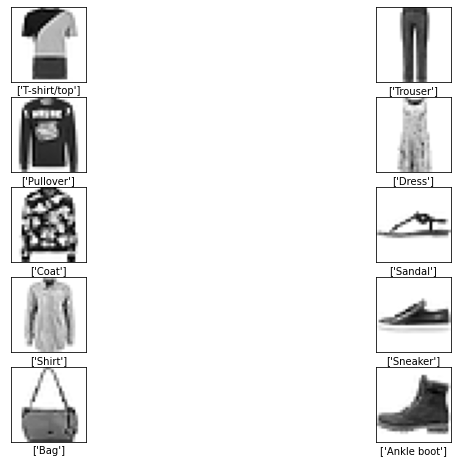

In [5]:
np.random.seed(231)

listSel = [] # create emply list to hold selected images

for i in range(len(class_names)):
    temp = np.where(y == i)[0] # Filter for one category of clothes
    # randomly select one example for that category:
    listSel.append(temp[np.random.choice(len(temp), size = 1, replace = False)]) 

npListSel = np.array(listSel)

plt.figure(figsize=(12,8))
    
for i in range(len(class_names)):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid(False)
    plt.imshow(X[npListSel[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y[npListSel[i]]])
plt.tight_layout    
plt.show()

### S3: Exploring the dataset
- Select all images in category "Dress" in the training set. Create and display a pixel-wise "average image" for this category.
- Create and display a pixel-wise "standard deviation image" for this category.
- Repeat the items above for the the category "Dress" in the testing set. Compare the average and standard deviation images.
- Repeat the items above for a different category you select.

Q3.1: Plot the 2D mean and std images for dresses in training and testing sets

Q3.2: Plot the 2D mean and std images for the category you selected in training and testing sets

Q3.3: Comment on differences between the mean and std images from training and testing datasets. What do you notice, and what might it mean?

In [6]:
def calcMean(df, lbl):
    tmp_df = df.loc[df['label'] == lbl] # filter df to include only selected class of images
    tmp_df = np.array(tmp_df.mean()) # calculate mean and return to an np array
    tmp_df = np.delete(tmp_df, 0) # remove the label column because it causes issues with reshaping
    tmp_df = np.rint(tmp_df) # round calculated values to nearest int
    tmp_df = tmp_df.astype(int) # cast calculated values to int for visualization
    return tmp_df
    
def calcStdv(df, lbl):
    tmp_df = df.loc[df['label'] == lbl] # filter df to include only selected class of images
    tmp_df = np.array(tmp_df.std()) # calculate stdv and return to an np array
    tmp_df = np.delete(tmp_df, 0) # remove the label column because it causes issues with reshaping
    tmp_df = np.rint(tmp_df) # round calculated values to nearest int
    tmp_df = tmp_df.astype(int) # cast calculated values to int for visualization
    return tmp_df
    
def vizIndvImg(df):
    tmp_df = df.reshape(28,28) # reshape array into 28 x 28 matrix to be vizualized
    plt.imshow(tmp_df, cmap=plt.cm.binary)
    plt.colorbar()

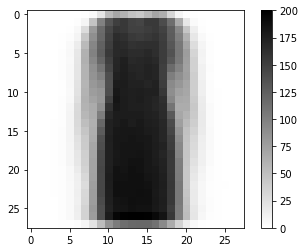

In [7]:
# Mean of training df dresses:
vizIndvImg(calcMean(dftrain, 3))

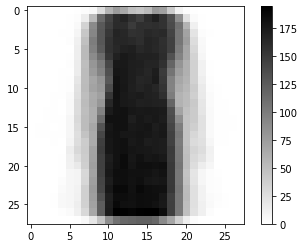

In [8]:
# Mean of test df dresses
vizIndvImg(calcMean(dftest, 3))

The mean calculated for the training set is more 'smooth' than the mean of the test dataset. In the vizualization for the test dresses, the dresses with sleaves contribute more to the average dress than they do in the training data. This may indicate that those types of dresses are less represented in the training data when compared to the total number of dresses. 

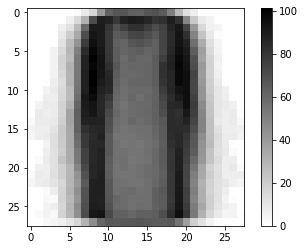

In [9]:
# Standard deviation of training df dresses
vizIndvImg(calcStdv(dftrain, 3))

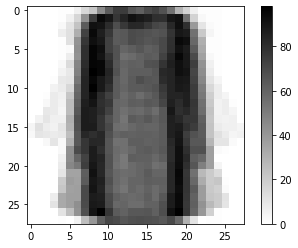

In [10]:
# Standard deviation of test df dresses
vizIndvImg(calcStdv(dftest, 3))

The observations made about the average dress are backed up by the visualizations of the standard deviation of dresses from the training and test sets. There is more deviation in the test data than there is in the training data. This may indicate that a model built on these data would be very good at predicting a sleaveless and shapely dress, but may have diminished predictive power on dresses that are wider and have sleaves.

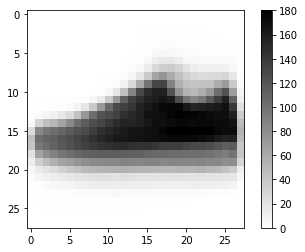

In [11]:
# Mean of training df sneakers:
vizIndvImg(calcMean(dftrain, 7))

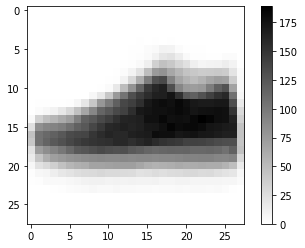

In [12]:
# Mean of test df sneakers
vizIndvImg(calcMean(dftest, 7))

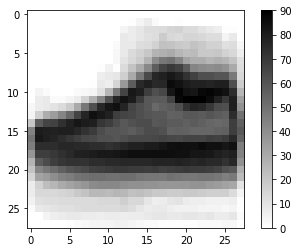

In [13]:
# Standard deviation of training df sneakers
vizIndvImg(calcStdv(dftrain, 7))

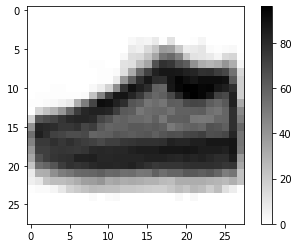

In [14]:
# Standard deviation of test df sneakers
vizIndvImg(calcStdv(dftest, 7))

### S4: Image distances
- In the training set, find the dress image that is most dissimilar to the average dress image. Show it as a 2D image
- In the training set, find the dress image most similar to mean image. Show it as a 2D image

Hint: You can use the "euclidian distance" as your similarity metric. Given that an image i in category dress is represented with a flattened feature vector v_i , and the mean image for category dress with the feature vector v_m, the distance between these two images can be calculated using the vector norm of their differences ( | v_i - v_m | ) 

Q4.1: What is the index of most dissimilar dress image:   ___

Q4.2: What is the index of most average looking dress image:   ___

Q4.3: Plot the most dissimilar dress image in 2D:   ___

Q4.4: Plot the most similar dress image in 2D:   ___

In [15]:
# Euclidean distance func adapted from: https://dataaspirant.com/five-most-popular-similarity-measures-implementation-in-python/

def euclidean_distance(x,y):
     return sqrt(sum(pow((x-y),2)))

In [16]:
meanDress = calcMean(dftrain, 3)

dresses = np.where(y == 3)[0]

dstVctrs = [] # initialize place holder for created Euclidean Distance vectors

for i in range(len(dresses)): # Iterate through all dresses in training data
    curDress = X[dresses[i]] # get array for current image to compare to avg dress
    curDressED = [] # initialize empty list for holding Calculated ED for each image
    
    for j in range(len(meanDress)): # iterate through each pixel
        # calculate Euclidean Distance between avg dress and current dress
        curDressED.append(abs(curDress[j] - meanDress[j])) # Add ED calculation to current dress result list
    
    dstVctrs.append(curDressED) # append ED array for each image to a result list

np_dstVctrs = np.array(dstVctrs) # cast output list to an np array

imgDstSum = np.sum(np_dstVctrs, axis =1) # Aggregate ED results for each image

In [17]:
mostDif = np.where(imgDstSum == np.amax(imgDstSum))
mdIdx = dresses[mostDif[0][0]]

mostDifImg = X[mdIdx]

print("The index of the most dissimilar dress is " + str(mdIdx))

The index of the most dissimilar dress is 230


The least average Dress


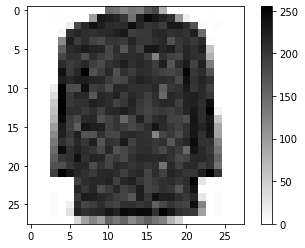

In [18]:
lbl = y[mdIdx]

mostDifImg = mostDifImg.reshape(28,28)
plt.imshow(mostDifImg, cmap=plt.cm.binary)
plt.colorbar()
print('The most dissimilar ' + class_names[lbl])

In [19]:
leastDif = np.where(imgDstSum == np.amin(imgDstSum))
ldIdx = dresses[leastDif[0][0]]

leastDifImg = X[ldIdx]

print("The index of the most similar dress is " + str(ldIdx))

The index of the most similar dress is 1010


The most average Dress


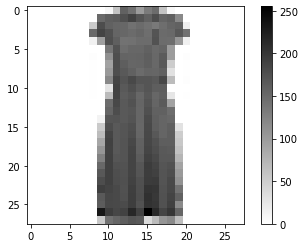

In [20]:
lbl = y[ldIdx]

leastDifImg = leastDifImg.reshape(28,28)
plt.imshow(leastDifImg, cmap=plt.cm.binary)
plt.colorbar()
print('The most average ' + class_names[lbl])

### S5: Image distances, part 2
- Repeat questions S3 and S4 after binarizing the images first

Q5.1: What is the index of most dissimilar dress image:   ___

Q5.2: What is the index of most similar dress image:   ___

Q5.3: Did the answer change after binarization? How do you interprete this finding?

In [30]:
# Binarize images:
bnDF = np.where(X[dresses] > 1, 1, 0)

display(bnDF)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

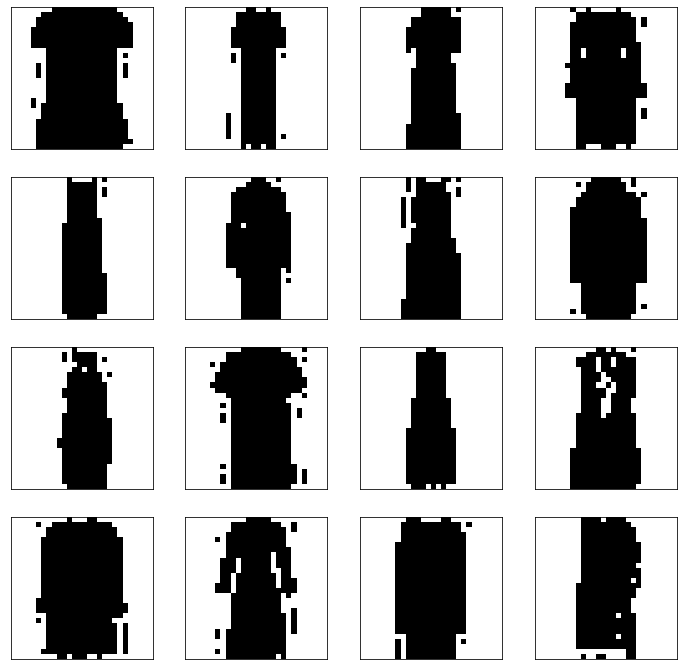

In [31]:
plt.figure(figsize=(12,12))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid(False)
    plt.imshow(bnDF[i].reshape(28,28), cmap=plt.cm.binary)
plt.tight_layout    
plt.show()

### S6: Binary classification between dresses and sandals
- Select images from these two categories (dresses and sandals) in the training dataset
- Split them into two sets (Set1, Set2) with 70% to 30% random split
- Replace category labels as 0 (dress) and 1 (sandal)
- Use Set1 to train a linear SVM classifier with default parameters and predict the class labels for Set2 
- Use Set2 to train a linear SVM classifier with default parameters and predict the class labels for Set1 

Q6.1: What is the prediction accuracy using the model trained on Set1:   ___

Q6.2: What is the prediction accuracy using the model trained on Set2:   ___

### S7: Binary classification between dresses and sandals, part 2
- Select images from these two categories (dresses and sandals) in the training dataset
- Split them into two sets (Set1, Set2) with 20% to 80% random split
- Select images from these two categories in the testing dataset
- Replace category labels as 0 (dress) and 1 (sandal)
- Use Set1 to train a linear SVM classifier with default parameters and predict the class labels for testing images 
- Use Set2 to train a linear SVM classifier with default parameters and predict the class labels for testing images

Q7.1: What is the prediction accuracy using the model trained on Set1:   ___

Q7.2: What is the prediction accuracy using the model trained on Set2:   ___

Q7.3: Comment on the differences in the accuracy of the two models. If there is a difference, why do you think that is?

### S8: k-NN Error Analysis
- In training and testing datasets select the images with labels: Dress, Coat, Sandal, Shirt or Sneaker
- Train a k-NN classifier using 4 to 40 nearest neighbors with a step size of 4
- Calculate and plot overall testing accuracy for each experiment

Q8.1: For k=4 what is the label that was predicted with lowest accuracy:   ___

Q8.2: For k=20 what is the label that was predicted with lowest accuracy:   ___

Q8.3: What is the label pair that was confused most often (i.e. class A is labeled as B, and vice versa):   ___

Q8.4: Visualize 5 mislabeled samples with their actual and predicted labels

### S9: Feature extraction
- We describe each image by using a reduced set of features (compared to n=784 initial features for each pixel value) as follows:
  
  1. Binarize the image (background=0, foreground=1)
  2. For each row i, find m_i, the index of the first non-zero pixel (m_i will be a value from 0 to 28 - if all pixels in a row are zero then m_i=28)
  
  Example image:
       0 0 0 0 1 1 1 ...
       0 0 1 1 1 0 0 ...
       0 0 0 0 0 1 0 ...
       ...
  Extracted features:     [4, 2, 5, ...]
  
  This strategy gives a feature vector with n=28 features (for each row)
  
  Repeat classification experiments in Q6 using this reduced feature set.

Q9.1: What is the prediction accuracy using the model trained on Set1:   ___

Q9.2: What is the prediction accuracy using the model trained on Set2:   ___


### BONUS:
Repeat S9 by extracting 28x4 features this time by applying the same rule in four different directions and concatenating them (left->right, right->left, top->bottom, bottom->top)